The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:

● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

● Data fetching and understand the train/val/test splits.

● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

● Print the classification metric report (2.5 points)

● Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

● Implement batch normalization for training the neural network (2.5 points)

● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Read the dataset:

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

Data fetching and understand the train/val/test splits.

In [0]:
import h5py   
import pandas as pd 
import numpy as np    


In [3]:
f1 = h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5",'r')
print(list(f1.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
X_train = np.array(f1['X_train'])
X_test = np.array(f1['X_test'])
X_val = np.array(f1['X_val'])
y_test = np.array(f1['y_test'])
y_train = np.array(f1['y_train'])
y_val = np.array(f1['y_val'])

In [5]:
display('X_train:',X_train.shape,'y_train:',y_train.shape,'X_test:',X_test.shape,'y_test:',y_test.shape,'X_val:',X_val.shape,'y_val:',y_val.shape)

'X_train:'

(42000, 32, 32)

'y_train:'

(42000,)

'X_test:'

(18000, 32, 32)

'y_test:'

(18000,)

'X_val:'

(60000, 32, 32)

'y_val:'

(60000,)

In [6]:
pd.DataFrame(y_train).head(6)

,0
0,2
1,6
2,7
3,4
4,4
5,0


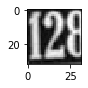

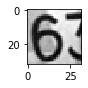

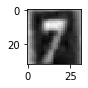

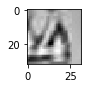

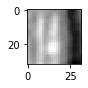

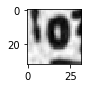

In [7]:
import matplotlib.pyplot as plt
for i in range(0,6):
  plt.figure(figsize = (1,1))
  plt.imshow(X_train[i],cmap='gray')
  plt.show()

In [0]:
nxtrainsamples, nxtrain1, nytrain1 = X_train.shape
X_train_new = X_train.reshape((nxtrainsamples,nxtrain1*nytrain1))
nxtestsamples, nxtest1, nytest1 = X_test.shape
X_test_new = X_test.reshape((nxtestsamples,nxtest1*nytest1))

nvalsxsamples, nxtrain3, nytrain3 = X_val.shape
X_val_new = X_val.reshape((nvalsxsamples,nxtrain3*nytrain3))

KNN Implementation:

● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

● Print the classification metric report (2.5 points)

In [0]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model_1 = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)

# Fitting or traning the model.
model_1.fit(X_train_new,y_train)
acc = model_1.score(X_train_new, y_train)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 100.00%


In [0]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)

# Fitting or traning the model.
model.fit(X_train_new,y_train)
acc = model.score(X_train_new, y_train)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 66.02%


In [0]:
model_3 = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

# Fitting or traning the model.
model_3.fit(X_train_new,y_train)
acc = model_3.score(X_train_new, y_train)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 69.97%


In [0]:
model_9 = KNeighborsClassifier(n_neighbors=9,n_jobs=-1)

# Fitting or traning the model.
model_9.fit(X_train_new,y_train)
acc = model_9.score(X_train_new, y_train)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 64.60%


Based on the accuracy, i have considered n_neibour as 3 and predicting with same

In [0]:
hold_out = model_3.predict_proba(X_test_new)

In [0]:
pd.DataFrame(hold_out).head(6)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.333333
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
2,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.000000,0.0,0.333333,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.666667
4,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.666667


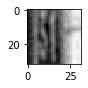

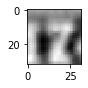

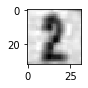

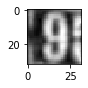

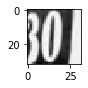

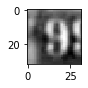

In [0]:
import matplotlib.pyplot as plt
for i in range(0,6):
  plt.figure(figsize = (1,1))
  plt.imshow(X_test[i],cmap='gray')
  plt.show()

CNN:

● Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

● Implement batch normalization for training the neural network (2.5 points)

In [12]:
import tensorflow as tf

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
x_train = f1['X_train'][:]
y_train = f1['y_train'][:]
x_test = f1['X_test'][:]
y_test = f1['y_test'][:]

In [0]:
x_train = x_train[0:22000,:]
y_train = y_train[0:22000]
x_test = x_test[0:8000,:]
y_test = y_test[0:8000]

Resize all the train and test inputs to 28X28, to match with MNIST CNN model's input size

In [17]:
#Importing opencv module for the resizing function
import cv2

#Create a resized dataset for training and testing inputs with corresponding size. Here we are resizing it to 28X28 (same input size as MNIST)
x_train_res = np.zeros((x_train.shape[0],28,28), dtype=np.float32)
for i in range(x_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  x_train_res[i,:,:] = cv2.resize(x_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

x_test_res = np.zeros((x_test.shape[0],28,28), dtype=np.float32)
for i in range(x_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  x_test_res[i,:,:] = cv2.resize(x_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
#We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
del x_train
del x_test

print(x_train_res.shape)
print(x_test_res.shape)

(22000, 28, 28)
(8000, 28, 28)


Reshape train and test sets into shapes compatible with keras models

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28


#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train_res.reshape(x_train_res.shape[0], img_rows, img_cols, 1)
x_test = x_test_res.reshape(x_test_res.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Normalizing the data

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (22000, 28, 28, 1)
22000 train samples
8000 test samples


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
import keras
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [30]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 22000 samples, validate on 8000 samples
Epoch 1/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2947 - acc: 0.9035 - val_loss: 0.3780 - val_acc: 0.8925
Epoch 2/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2884 - acc: 0.9063 - val_loss: 0.3747 - val_acc: 0.8940
Epoch 3/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2758 - acc: 0.9099 - val_loss: 0.3782 - val_acc: 0.8961
Epoch 4/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2702 - acc: 0.9123 - val_loss: 0.3847 - val_acc: 0.8939
Epoch 5/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2600 - acc: 0.9149 - val_loss: 0.3904 - val_acc: 0.8945
Epoch 6/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2560 - acc: 0.9167 - val_loss: 0.3846 - val_acc: 0.8938
Epoch 7/20
22000/22000 [==============================] - 51s 2ms/step - loss: 0.2467 - acc: 0.9166 - val_loss: 0.3811 - val_acc:

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 64)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
drop_2 (Dropout)             (None, 128)              

## From this exercise, w.r.t KNN and Neural Network, I observe below:

 # Time taken for KNN is morethan DNN,
 # Accuracy is pretty high in DNN

 # KNN learns each and every dataset from train, which leads to higher time while execution